<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_05_26-aula16/Importando_base_CHIRPS_PURUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faz a leitura de arquivos de precipitação (mm) da base CHIRPS

In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [2]:
# Baixa dados da base CHIRPS
!gdown 1Z9SQGph3kOU3GafkUrmM1_6lVI9VHFP6

Downloading...
From: https://drive.google.com/uc?id=1Z9SQGph3kOU3GafkUrmM1_6lVI9VHFP6
To: /content/ClimateEngine_Purus_CHIRPS.csv
100% 312k/312k [00:00<00:00, 66.7MB/s]


In [3]:
# dados da base CHIRPS
Purus_CHIRPS = pd.read_csv('ClimateEngine_Purus_CHIRPS.csv',
                          sep=';', index_col=[0])
Purus_CHIRPS.index=pd.to_datetime(Purus_CHIRPS.index)
Purus_CHIRPS = Purus_CHIRPS.replace(regex={',': '.'}).astype(float)
Purus_CHIRPS

,"(mm) Precipitation (CHIRPS) at CE_ID_1, 1981-01-01 to 2024-03-31"
1981-01-01,10.8982
1981-01-02,11.2424
1981-01-03,15.9600
1981-01-04,13.6556
1981-01-05,25.4458
...,...
2024-03-27,8.4028
2024-03-28,3.7962
2024-03-29,10.2344
2024-03-30,4.5556


In [4]:
!gdown 1f0F4ut_AxhpKEa_F6nMMxqrQADAMnzUZ

Downloading...
From: https://drive.google.com/uc?id=1f0F4ut_AxhpKEa_F6nMMxqrQADAMnzUZ
To: /content/prec_espacializada_Purus.csv
100% 855k/855k [00:00<00:00, 75.5MB/s]


In [5]:
# Dados de pluviômetros
Purus_pluviom = pd.read_csv('prec_espacializada_Purus.csv',
                          sep=',', index_col=[0])
Purus_pluviom.index=pd.to_datetime(Purus_pluviom.index)
Purus_pluviom


,1068000,966000,963001,867001,765000,770000,668000,567001,media aritmetica,media thiessen
data,,,,,,,,,,
1980-01-01,20.5,20.6,0.0,18.0,15.2,0.0,30.4,4.4,13.917537,16.437869
1980-01-02,0.0,0.0,0.0,0.0,16.4,0.0,0.0,22.6,4.763248,3.757479
1980-01-03,0.0,0.0,2.2,0.0,0.0,0.0,0.0,23.8,2.928962,0.039620
1980-01-04,0.0,1.0,6.4,14.0,0.0,10.3,0.0,0.0,3.970107,4.038569
1980-01-05,0.0,1.2,0.6,0.0,5.2,21.1,0.0,0.0,3.543286,3.820360
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.0,0.0,0.0,3.1,1.6,0.0,11.3,56.3,8.277432,1.436818
2010-12-28,0.0,66.2,39.0,0.0,0.7,0.0,0.0,41.0,17.139076,6.128264
2010-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,3.712500,0.000000


In [6]:
# Cria DataFrame contendo as duas colunas
df = pd.DataFrame()

df['prec_CHIRPS(mm)'] = Purus_CHIRPS['1981-01-01':'2010-12-31']
df['prec_PLUVIO(mm)'] = Purus_pluviom['1981-01-01':'2010-12-31']['media thiessen']
df

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-01,10.8982,5.376438
1981-01-02,11.2424,22.177539
1981-01-03,15.9600,14.650725
1981-01-04,13.6556,20.789195
1981-01-05,25.4458,25.131866
...,...,...
2010-12-27,10.1868,1.436818
2010-12-28,3.0995,6.128264
2010-12-29,3.0987,0.000000
2010-12-30,15.1228,4.244472


In [7]:
df.isna().sum()

prec_CHIRPS(mm)    0
prec_PLUVIO(mm)    0
dtype: int64

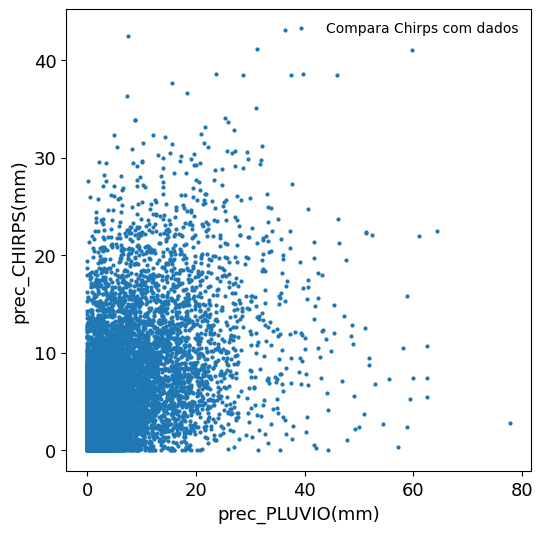

In [8]:
plt.figure(figsize=(6,6))
#z = numpy.array([0, 60000])
plt.plot(df['prec_PLUVIO(mm)'],df['prec_CHIRPS(mm)'], 'o-',linewidth = 0,markersize = 2, markeredgewidth = 1,label='Compara Chirps com dados')
#plt.plot(z,z,color='black')

plt.xlabel('prec_PLUVIO(mm)', fontsize=13) #y label
plt.ylabel('prec_CHIRPS(mm)', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('pluvio.png', dpi = 300)
plt.show();

In [9]:
# Acumula os dados
acumulado = df.cumsum() #calculando o acumulado dos dados de cada coluna do dataframe
acumulado

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-01,10.8982,5.376438
1981-01-02,22.1406,27.553977
1981-01-03,38.1006,42.204702
1981-01-04,51.7562,62.993897
1981-01-05,77.2020,88.125763
...,...,...
2010-12-27,61326.6603,62453.619660
2010-12-28,61329.7598,62459.747924
2010-12-29,61332.8585,62459.747924
2010-12-30,61347.9813,62463.992396


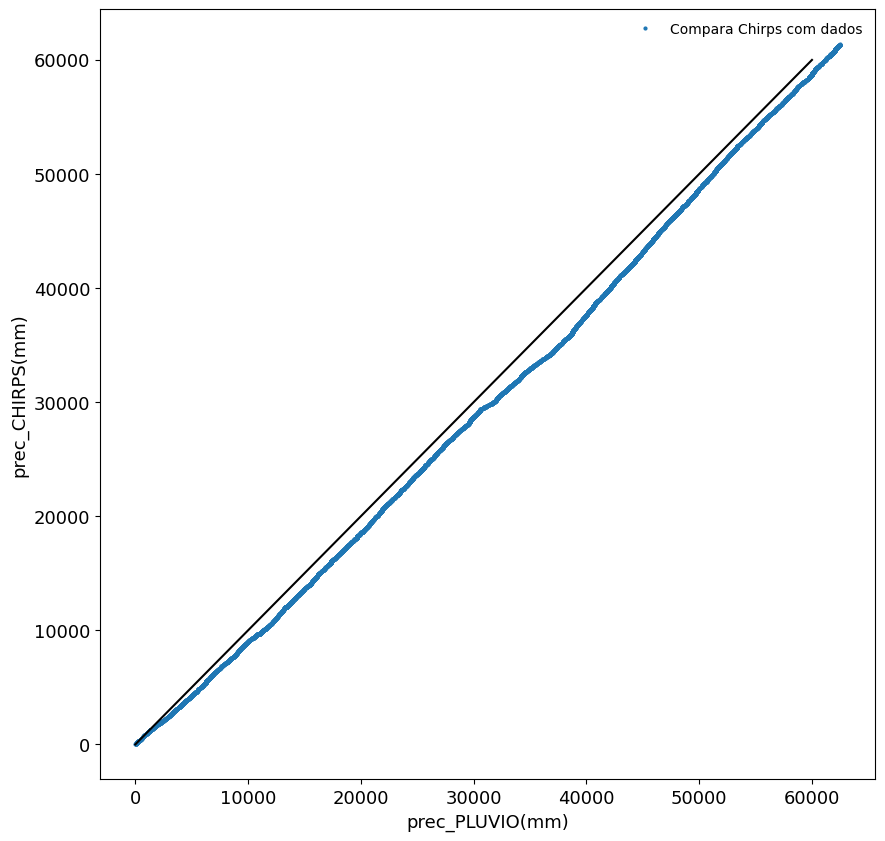

In [10]:
plt.figure(figsize=(10,10))
z = numpy.array([0, 60000])
plt.plot(acumulado['prec_PLUVIO(mm)'],acumulado['prec_CHIRPS(mm)'], 'o-',linewidth = 0,markersize = 2, markeredgewidth = 1,label='Compara Chirps com dados')
plt.plot(z,z,color='black')

plt.xlabel('prec_PLUVIO(mm)', fontsize=13) #y label
plt.ylabel('prec_CHIRPS(mm)', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('pluvio.png', dpi = 300)
plt.show();

In [11]:
df_anual = df.resample('y').sum()
df_anual

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-12-31,2137.0046,2567.238019
1982-12-31,2217.3215,2516.802651
1983-12-31,1769.3726,1793.078089
1984-12-31,2262.6181,2463.974587
1985-12-31,2304.8316,2824.652676
1986-12-31,2215.1927,2089.178439
1987-12-31,1975.5124,1929.100950
1988-12-31,1879.9586,1987.372236
1989-12-31,2181.3541,2270.583892
1990-12-31,2038.1503,1837.581291


<Axes: >

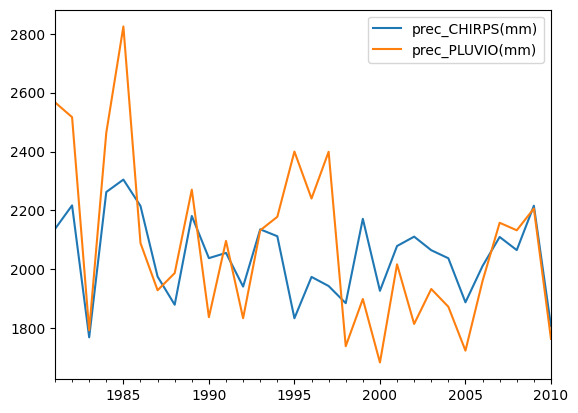

In [12]:
df_anual.plot()

In [13]:
df_mensal = df.resample('m').sum()
df_mensal

,prec_CHIRPS(mm),prec_PLUVIO(mm)
1981-01-31,297.2629,265.325663
1981-02-28,274.4086,348.481941
1981-03-31,302.6189,305.734917
1981-04-30,182.6908,186.577339
1981-05-31,128.3054,146.716908
...,...,...
2010-08-31,33.7505,17.074537
2010-09-30,82.6107,70.304852
2010-10-31,184.6774,135.107554
2010-11-30,214.2130,212.135918


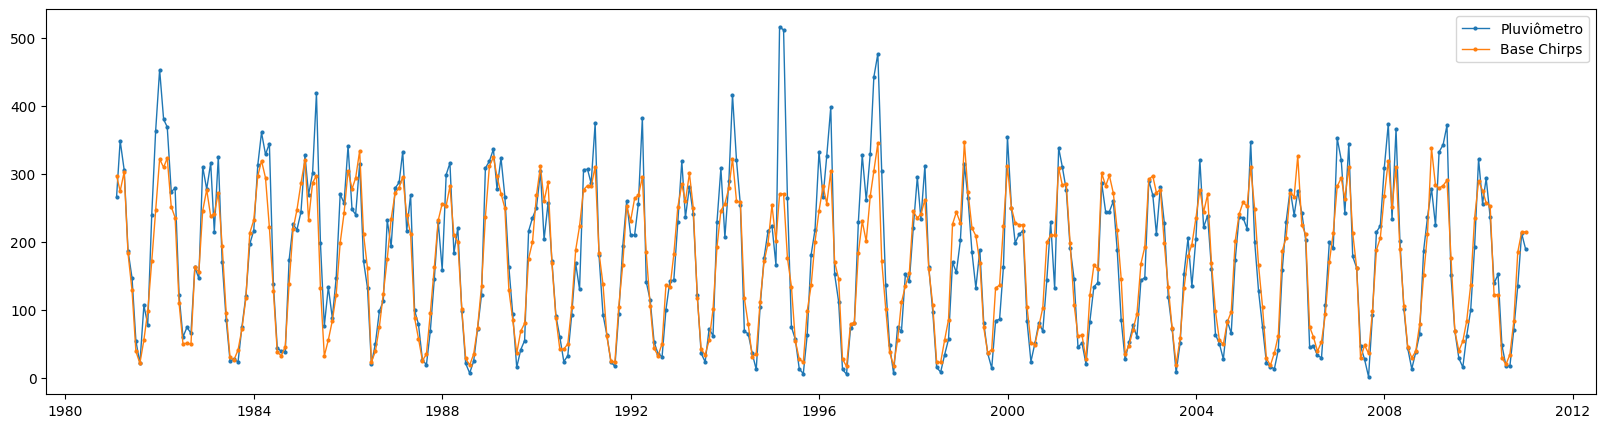

In [14]:
plt.figure(figsize=(20,5))
plt.plot(df_mensal['prec_PLUVIO(mm)'], 'o-',linewidth = 1,markersize = 2, markeredgewidth = 1,label='Pluviômetro')
plt.plot(df_mensal['prec_CHIRPS(mm)'], 'o-',linewidth = 1,markersize = 2, markeredgewidth = 1,label='Base Chirps')
plt.legend()
plt.show();